# Sigmoid perceptron 

In this section we will implement training algorithm for single perceptron with sigmoid activation function.


Let us start with defining our perceptron with sigmoid activation function.

1. Considered perceptron is a mapping from $\hat{X} \in \mathbb{R}^M \to \hat{Y} \in \mathbb{R}$,
We denote $M$ as a number of features, i.e. size of the input to the perceptron.

We consider set of $N$ tuples $(\hat{x}_i, \hat{y}_i)$ belonging to training data $\hat{x}_i \in \hat{X}_{train}$ and $\hat{y}_i \in \hat{Y}_{train}$


2. Mathematical formulation of the perceptron is $\hat{y}_i = \sigma(z_i)$, 
where $z_i = \hat{x}_i W + B$.  $W$ are weights, $B$ is bias, and activation function reads $\sigma(z_i) = \frac{1}{1 + e^{-z_i}}$. 
   

## Sigmoid perceptron update

Training of a perceptron is done by an iterative update of weights $W$ and bias $B$ in order to minimize the loss function $L$. As a loss function we consider mean-squared error:

\begin{equation}
\begin{split}
L & = \frac{1}{N}\sum_{i=1}^N L_i\\
L_i & = \frac{1}{2}(y_i - \hat{y}_i)^2,
\end{split}
\end{equation}

where $y_i$ is our prediction.

We update weights $W$ and bias $B$ with the gradient descent procedure:

\begin{equation}
\begin{split}
W & \leftarrow W - \eta \frac{\partial L}{\partial W} = W - \frac{\eta}{N} \sum_{i=1}^N \frac{\partial L_i}{\partial W}\\
B & \leftarrow B - \eta \frac{\partial L}{\partial B} = W - \frac{\eta}{N} \sum_{i=1}^N \frac{\partial L_i}{\partial B},
\end{split}
\end{equation}

where $\eta$ is a learning rate.

Let us calculate gradients:

\begin{equation}
\begin{split}
\frac{\partial L_i}{\partial W} & = (y_i - \hat{y}_i)\frac{\partial y_i}{\partial W}\\
\frac{\partial L_i}{\partial B} & = (y_i - \hat{y}_i)\frac{\partial y_i}{\partial B}\\
y_i & = \sigma(z_i) \\
z_i & = x_iW + B
\end{split}
\end{equation}

With the chain rule we have:

\begin{equation}
\begin{split}
\frac{\partial y_i}{\partial W} & = \frac{\partial \sigma(z_i)}{\partial z_i}\frac{\partial z_i}{\partial W} \\
\frac{\partial y_i}{\partial B} & = \frac{\partial \sigma(z_i)}{\partial z_i}\frac{\partial z_i}{\partial B} 
\end{split} 
\end{equation}

::: {.callout-tip}
## Exercise
Show that update rule for weights $W$ and bias $B$ is:

\begin{equation}
\begin{split}
W & \leftarrow W - \frac{\eta }{N}\sum_{i=1}^N (y_i - \hat{y}_i) y_i(1-y_i)x_i\\
B & \leftarrow B - \frac{\eta }{N}\sum_{i=1}^N (y_i - \hat{y}_i) y_i(1-y_i)
\end{split}
\end{equation}
:::

## Implementation from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 

def sigmoid(x):
  # Return the sigmoid of x
  return 1 / (1 + np.exp(-x))
 
def loss_function(y_pred,y_train):
    return 0.5*np.mean( (y_pred - y_train)**2)

# Backpropagation algorithm for perceptron with sigmoid activation function
def train_model(X, y, weights, bias, num_epochs, learning_rate, mse_vec):
    # Loop through the epochs

    for epoch in range(num_epochs):
        # Loop through the training examples
        gradient_weights = 0
        gradient_bias = 0      
        
        y_pred = sigmoid(np.dot(X,weights) + bias) #Feed-forward
        mse = np.mean((y_pred - y)**2)
        mse_vec.append(mse)
        
        # training
        for i in range(len(X)):
            # Get the input and output for the example
            x_i = X[i]
            y_true_i = y[i]
            y_pred_i = y_pred[i] 
            # Calculate the error between the predicted output and the true output
            error =  y_pred_i - y_true_i
            
            # Calculate the gradient of the error with respect to the weights and biases
            gradient_weights = gradient_weights + y_pred_i*(1-y_pred_i)*x_i*error
            gradient_bias    = gradient_bias + y_pred_i*(1-y_pred_i)*error

        # Update the weights and biases using the gradient and the learning rate
        weights -= learning_rate * gradient_weights/N_train
        bias -= learning_rate * gradient_bias/N_train
 
    return weights, bias

In [ ]:
#Generate training and test datasets
M = 10  # number of features

N_train = 10000 # training data points
X_train = np.random.rand(N_train,M)
y_train =  sigmoid(np.random.rand(N_train))


N_test = 100 # testing data points
X_test = np.random.rand(N_test,M)
y_test = sigmoid(np.random.rand(N_test))

     After training with learning rate 0.50: MSE @ test set: 0.00434
     After training with learning rate 0.10: MSE @ test set: 0.00437
     After training with learning rate 0.05: MSE @ test set: 0.00437


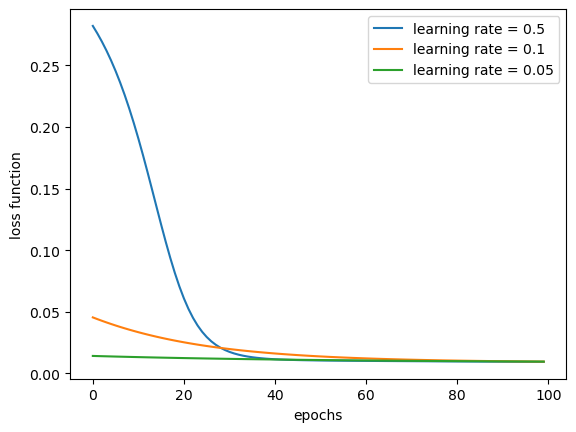

In [ ]:
# Set the learning rate and number of epochs
weights_initial = np.random.uniform(-1,1,M) # set up initial weights 
bias_initial    = 0.0

num_epochs = 100 
learning_rate_vec = [0.5, 0.1, 0.05]

for learning_rate in learning_rate_vec:
    # Set the initial weights and bias
    weights = weights_initial
    bias    = bias_initial
    mse_vec = [] # list containing evolution of loss function with training epochs

    # Train the perceptron
    weights, bias = train_model(X_train, y_train, weights, bias, num_epochs, learning_rate, mse_vec)

    # Evaluate model on the test set after training 
    y_pred = sigmoid(np.dot(X_test, weights) + bias)
    mse = loss_function(y_pred,y_test)

    print(f'     After training with learning rate {learning_rate:.2f}: MSE @ test set: {mse:.5f}')
    plt.plot(mse_vec, label = "learning rate = " + str(learning_rate))
    plt.xlabel("epochs")
    plt.ylabel("loss function")
    plt.legend()


# Single layer Neural Network

Here, we will consider single layer Neural Network with sigmoid activation function.



## Single layer Neural Network definition
Let's consider particular single layer Neural Network. The input of the network has $M=10$ nodes, hidden layer has $K = 6$ nodes, and the output layer has $J = 2$ nodes. The first weigth matrix $W_1$ has shape $[M,K]$, and the second weight matrix $W_2$ has shape $[K ,J]$.


We have training data set $\hat{X}$ containing $N$ entries, i.e. training data is a matrix of shape $[N, M]$. The "labels"  $\hat{Y}$ are matrix of shape $[N,J]$.



## Feed-forward pass
Now, let's consider feed-forward pass of the training data $\hat{X}$ through our Neural Network.  

1. $h = \hat{X}W_{1} + B_1$ $\rightarrow$ $h$ has shape: $[N, M] \times [M, K] = [N,K]$
2. $H = \sigma(h)$    $\rightarrow$ $H$ has shape: $[N,K]$
3. $g = HW_{2}$       $\rightarrow$ $g$ has shape: $[N,K] \times [K,J] = [N,J]$
4. $Y = \sigma(g)$    $\rightarrow$ $Y$ has shape: $[N,J]$

## Update parameters

We will use the MSE loss function denoted in matrix rerpesentation as
$L = \frac{1}{2N}||Y - \hat{Y}||^2$,

Assuming learning rate $\eta$ the update of   $W_1$, $B_1$, and $W_2$ is:

\begin{equation}
\begin{split}
  W_1 & = W_1 - \frac{\eta}{N}\frac{\partial L}{\partial W_1} \\
  B_1 & = B_1 - \frac{\eta}{N}\frac{\partial L}{\partial B_1} \\
  W_2 & = W_2 - \frac{\eta}{N}\frac{\partial L}{\partial W_2}.
\end{split}
\end{equation}


Let us calculate gradients of the loss function with respect to  $W_1$, $B_1$, $W_2$ using the chain rule:

\begin{equation}
\begin{split}
\frac{\partial L}{\partial W_{2}} & = \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial g}\frac{\partial g}{\partial W_{2}} \\
\frac{\partial L}{\partial W_{1}} & = \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial g}\frac{\partial g}{\partial H}\frac{\partial H}{\partial h}\frac{\partial h}{\partial W_{1}}\\
\frac{\partial L}{\partial B_{1}} & = \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial g}\frac{\partial g}{\partial H}\frac{\partial H}{\partial h}\frac{\partial h}{\partial B_{1}}
\end{split}
\end{equation}

6. We have

\begin{equation}
\begin{split}
 \frac{\partial L}{\partial Y} & = Y - \hat{Y} \\
 \frac{\partial Y}{\partial g} & = Y(1-Y) \\
 \frac{\partial g}{\partial W_{2}} & = H \\ 
 \frac{\partial g}{\partial H} & = W_{2} \\
 \frac{\partial H}{\partial h} & = H(1-H) \\
 \frac{\partial h}{\partial W_1} & = \hat{X}\\
 \frac{\partial h}{\partial B_1} & = \mathbb{1}
\end{split}
\end{equation}


7. Let's define helper functions

\begin{equation}
\begin{split}
 Q_2 & \equiv \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial g}  \\
 Q_1 & \equiv \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial g}\frac{\partial g}{\partial H}\frac{\partial H}{\partial h}
 \end{split}
\end{equation}


::: {.callout-tip}
### Exercise
Show explicitly that $Q_1$, and $Q_2$ read:
\begin{equation}
\begin{split}
 Q_2 & \equiv \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial g} = (Y-\hat{Y})Y(1-Y) \\
 Q_1 & \equiv \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial g}\frac{\partial g}{\partial H}\frac{\partial H}{\partial h} = Q_1 W_{2}H(1-H)
 \end{split}
\end{equation}
:::

::: {.callout-tip}
### Exercise
Show that update rules for weights $W_1$ and $W_2$ are

$W_2 = W_2 - \frac{\eta}{N}H^TQ_2$

$B_1 = B_1 - \frac{\eta}{N}Q_1$

$W_1 = W_1 - \frac{\eta}{N}X^TQ_1$


$Q_2 = (Y-\hat{Y})Y(1-Y)$

$Q_1 = Q_2W_2^TH(1-H)$

 


Hint 1: Operations in $(Y-\hat{Y})Y(1-Y)$ are element-wise multiplications.

Hint 2: Operations in $H(1-H)$ are element-wise multiplications.

Hint 3: Resulting weights updates have to be the same dimension as the weight matrices.
:::

### Warm-up: Training from scratch

<matplotlib.legend.Legend>

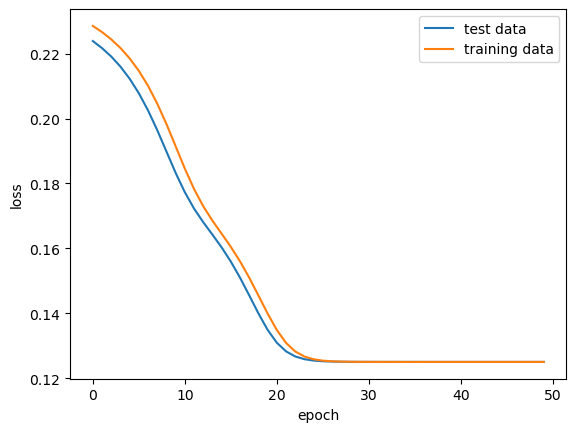

In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Define NN architecture

M = 10  # number of nodes in the input layer
K = 6   # number of nodes in the hidden layer
J = 2   # number of nodes in the output layer


# Prepare training and test data

N_train = 100000      # number of training data
X_train = np.random.rand(N_train,M)
Y_train = np.random.randint(0,2, size=(N_train, J))


N_test = 1000     # number of training data
X_test = np.random.rand(N_test,M)
Y_test = np.random.randint(0,2, size=(N_test, J))


# Set training parameters

eta = 1      # learning rate
N_epoch = 50  # training epochs


W_1 = np.random.rand(M,K)  # initialize weights
W_2 = np.random.rand(K,J)  # initialize weights

loss_vs_epoch_train_data = []
loss_vs_epoch_test_data = []
for epoch in range(0,N_epoch):   
    #Feed-forward pass of the training data
    X = X_train
    h = X@W_1
    H = sigmoid(h)
    g = H@W_2
    Y = sigmoid(g)
    
    #Calculate loss function
    L_train = 0.5*np.mean((Y - Y_train)**2)
    loss_vs_epoch_train_data.append(L_train)    
    
    #Helpers for calculating update
    Q_2 = (Y-Y_train)*Y*(1-Y) # element-wise multiplication
    Q_1 = Q_2@W_2.T*H*(1-H)
    
    # Update weights
    W_2 = W_2 - eta/N_train*H.T@Q_2       #W_2 update 
    W_1 = W_1 - eta/N_train*X_train.T@Q_1 #W_1 update
    
    
    #Feed-forward pass of the test data for loss vs epoch monitoring
    X = X_test
    h = X@W_1
    H = sigmoid(h)
    g = H@W_2
    Y = sigmoid(g)

    #Calculate loss function
    L_test = 0.5*np.mean((Y - Y_test)**2)
    loss_vs_epoch_test_data.append(L_test)
 
plt.plot(loss_vs_epoch_test_data, label = "test data")
plt.plot(loss_vs_epoch_train_data, label = "training data")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

### Handwritten digits data set : MNIST

Here, we will train our single layer Neural Network on a handwritten digits from MNIST dataset. 
MNIST stands for Modified National Institute of Standards and Technology.
Architecture of our single layer Neural Network:

1. Input layer with  $M = 28\times28$ nodes 
2. Hidden layer with $K = 25$ nodes
3. Ouptut layer with $J = 1$ node

We take sigmoid activation function.


We start with importing MNIST dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def sigmoid(x):
    return 1/(1+np.exp(-x))


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
N_train_all = 60000
N_test_all = 10000
Nx = 28
Ny = 28
assert x_train.shape == (N_train_all, Nx, Ny)
assert x_test.shape == (N_test_all, Nx, Ny)
assert y_train.shape == (N_train_all,)
assert y_test.shape == (N_test_all,)

2023-01-02 18:23:53.267188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 18:23:53.365798: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-02 18:23:53.726895: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-02 18:23:53.726930: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

Let's have a look at examples of the data

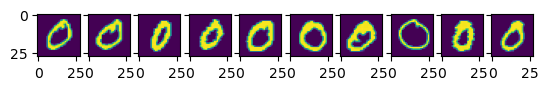

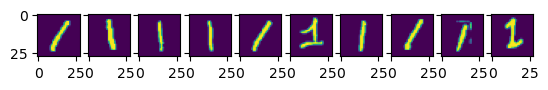

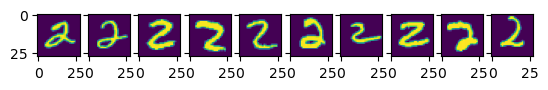

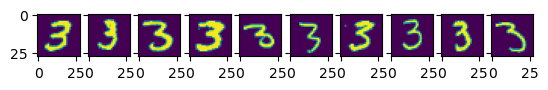

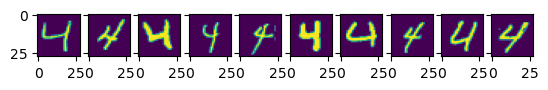

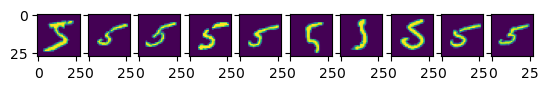

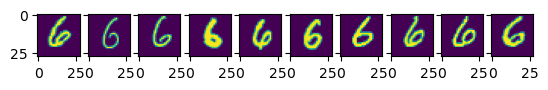

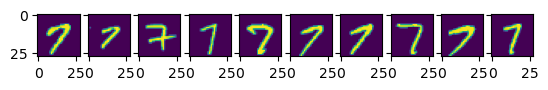

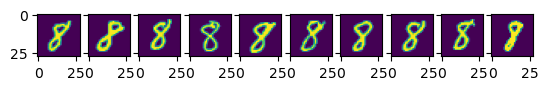

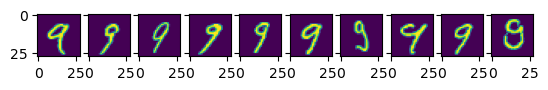

In [ ]:
k = 10
for i in range(0,10):
    idx = np.where(y_train[:]==i)[0] # find indices of i-digit
    fig, ax = plt.subplots(1,k, sharey=True)
    for j in range(0,k):
        ax[j].imshow(x_train[idx[j],:])
    plt.show()

Before passing the data through the model, we have to first preprocess them:

   1. Each picture we transform as $\vec{x}_i \to \frac{\vec{x}_i - \text{mean}(\vec{x}_i)}{\text{std}(\vec{x})}$
    
   2. Because output node has simgoid activation function returning number in range $[0\dots1]$ we map each label $y \in \{0,1,2,\dots,9\}$ to a number in range $[0,1]$ via $y_i \to \frac{1}{10}y_i$. The reason is due to the fact, that we are using sigmoid activation function in the last output node, which gives number in range $[0,1]$.

In [ ]:
def normalize_data(x):
    return (x - np.mean(x))/np.std(x)

#Let us transform data

X_train = np.zeros((N_train_all, Nx*Ny))
X_test  = np.zeros((N_test_all,  Nx*Ny))
Y_train = np.zeros((N_train_all, 1))
Y_test  = np.zeros((N_test_all,  1))


for i in range(0,N_train_all):
    X_train[i,:] = x_train[i,:].reshape((Nx*Ny,))    # flatten images
    X_train[i,:] = normalize_data(X_train[i,:])      # normalize data to mean = 0, std = 1
    Y_train[i] = y_train[i]/10.0                     # each digit maps to number [0,...,1]
    
for i in range(0,N_test_all):
    X_test[i,:] = x_test[i,:].reshape((Nx*Ny,))      # flatten images
    X_test[i,:] = normalize_data(X_test[i,:])        # normalize data to mean = 0, std = 1    
    Y_test[i] = y_test[i]/10.0    
    
    
# We choose small subset from training data
N_train = 60000
idx = np.random.randint(0, N_train_all, N_train)
X_train = X_train[idx,:]
Y_train = Y_train[idx]    



# We choose small subset from training data
N_test = 10000
idx = np.random.randint(0, N_test_all, N_test)
X_test = X_test[idx,:]
Y_test = Y_test[idx]  

In [ ]:
# Shuffle training data

idx = np.arange(0,N_train)
idx_shuffle = np.random.permutation(idx)

X_train = X_train[idx_shuffle,:]
Y_train = Y_train[idx_shuffle]


Setting Neural Network shapes

In [ ]:
# NN parameters
M = Nx*Ny  # number of nodes in the input layer
K = 21 # number of nodes in the hidden layer
J = 1      # number of nodes in the output layer 

# Training loop parameters
eta = 50 # learning rate
N_epoch = 1000 # training epochs

In [ ]:
# Hint: Having given vector "a", we want to stack it n times
n = 5
stack_helper = np.ones((n))
a = np.array([1,2,3,4])
c = np.outer(stack_helper,a)
print(c)

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


Training loop: feed-forward + backpropagation

In [ ]:
W_1_initial = 1*(np.random.rand(M,K) - 0.5)  # initialize weights, uniform distribution [-1,1]
W_2_initial = 1*(np.random.rand(K,J) - 0.5)  # initialize weights, uniform distribution [-1,1]
b_1_initial = 1*(np.random.rand(K)   - 0.5)   # initialize bias, uniform distribution [-1,1]




W_1 = np.copy(W_1_initial)
W_2 = np.copy(W_2_initial)
b_1 = np.copy(b_1_initial)


loss_train_vs_epoch = []
loss_test_vs_epoch = []

stack_helper_train = np.ones((X_train.shape[0]))   #  
B_1 = np.outer(stack_helper_train, b_1)            # matrix of biases with shape [N_train, K]
for epoch in range(0,N_epoch): # Training loop/Backpropagation
    #Feed-forward pass of the training data 
    h = X_train@W_1
    h = h + B_1
    H = sigmoid(h)
    g = H@W_2
    Y = sigmoid(g)      
    loss_train = 0.5*np.mean((Y - Y_train)**2)    
    loss_train_vs_epoch.append(loss_train)

    #Helpers for calculating update
    Q_2 = (Y-Y_train)*Y*(1-Y) # element-wise multiplication
    Q_1 = Q_2@W_2.T*H*(1-H)

    # Update weights
    W_2 = W_2 - eta/N_train*H.T@Q_2       #W_2 update 
    W_1 = W_1 - eta/N_train*X_train.T@Q_1 #W_1 update
    B_1 = B_1 - eta/N_train*Q_1

    #Feed-forward pass of the batch test data 
    b_1 = B_1[0,:] # we need to extract only one row 
    stack_helper_test = np.ones((X_test.shape[0]))
    B_1_test = np.outer(stack_helper_test,b_1)
    h = X_test@W_1
    h = h + B_1_test
    H = sigmoid(h)
    g = H@W_2
    Y = sigmoid(g)      
    loss_test = 0.5*np.mean((Y - Y_test)**2)    
    loss_test_vs_epoch.append(loss_test)    


<matplotlib.legend.Legend>

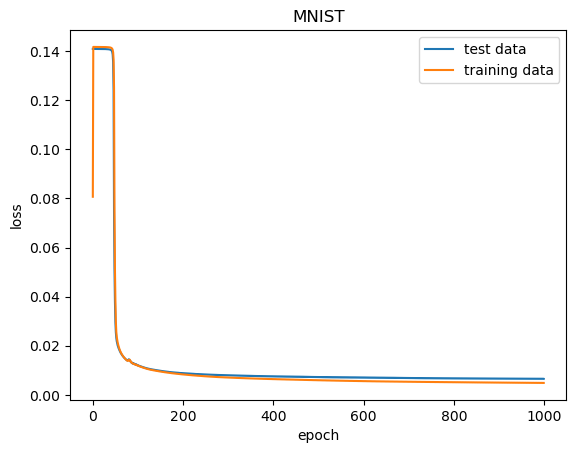

In [ ]:
plt.plot(loss_test_vs_epoch, label = "test data")
plt.plot(loss_train_vs_epoch, label = "training data")
plt.title("MNIST")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

Now, we can check how our trained Neural Network can predict labels from uknown test data. But first, we have to map our outputs of neural networks into digits, i.e. $y^{\text{pred}}_i \to y^{\text{pred}}_i = \text{int}(10 y^{\text{pred}}_i)$.


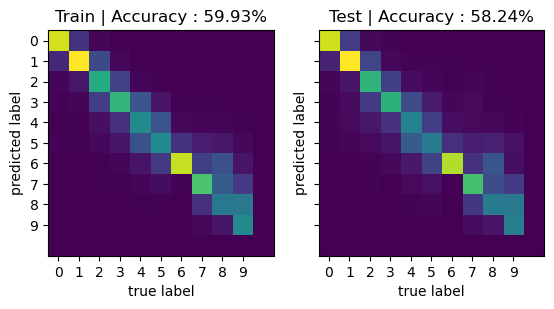

In [ ]:
b_1 = B_1[0,:]

#Make prediction on training data
stack_helper_train = np.ones((X_train.shape[0]))
B_1_train = np.outer(stack_helper_train,b_1)
h = X_train@W_1
h = h + B_1_train
H = sigmoid(h)
g = H@W_2
Y_train_pred = sigmoid(g)     


#Make prediction on test data
stack_helper_test = np.ones((X_test.shape[0]))
B_1_test = np.outer(stack_helper_test,b_1)
h = X_test@W_1
h = h + B_1_test
H = sigmoid(h)
g = H@W_2
Y_test_pred = sigmoid(g)  

Y_train_pred_round = np.around(Y_train_pred*10)
Y_test_pred_round = np.around(Y_test_pred*10)
 

Y_train_true = Y_train*10.
Y_test_true = Y_test*10.

confusion_matrix_train = np.zeros((11,11))
for i in range(0,N_train):
    confusion_matrix_train[int(Y_train_pred_round[i]), int(Y_train_true[i])] += 1

confusion_matrix_test = np.zeros((11,11))
for i in range(0,N_test):
    confusion_matrix_test[int(Y_test_pred_round[i]), int(Y_test_true[i])] += 1
 
 
accuracy_train = np.sum(np.diagonal(confusion_matrix_train))/np.sum(confusion_matrix_train)
accuracy_test  = np.sum(np.diagonal(confusion_matrix_test))/np.sum(confusion_matrix_test)


fig, ax = plt.subplots(1,2, sharey=True)
ax[0].imshow(confusion_matrix_train)
ax[0].set_title("Train | Accuracy : " + "{:2.2f}".format(accuracy_train*100) + "%")
ax[0].set_xlabel("true label");
ax[0].set_ylabel("predicted label");
ax[0].set_xticks(np.arange(0,10));
ax[0].set_yticks(np.arange(0,10));

ax[1].imshow(confusion_matrix_test)
ax[1].set_title("Test | Accuracy : " + "{:2.2f}".format(accuracy_test*100) + "%")
ax[1].set_xlabel("true label");
ax[1].set_ylabel("predicted label");
ax[1].set_xticks(np.arange(0,10));
ax[1].set_yticks(np.arange(0,10));
plt.show()  

As we can see, the accuracy matrix has quite diagonal structure! With accuracy $\sim 60$ we show that our super-simple architecture with one hidden layer and one output node can predict the handwritten digit $6$ times better than random guess!

Let's have a look at different predictions:

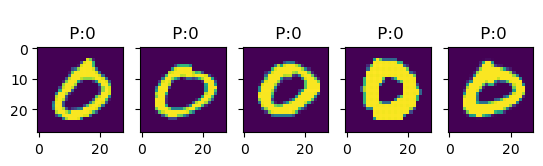

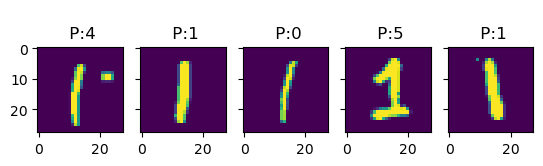

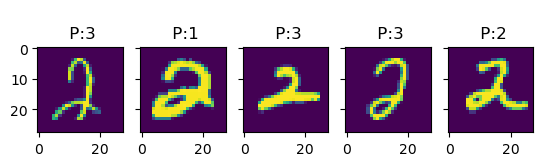

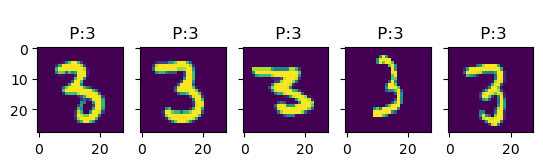

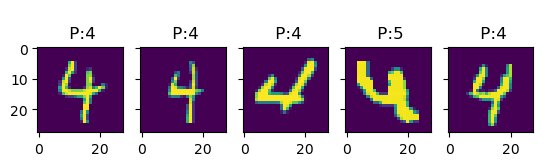

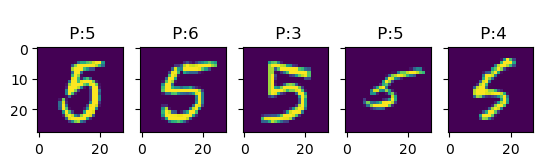

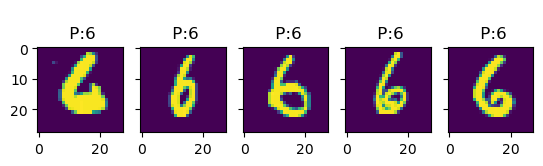

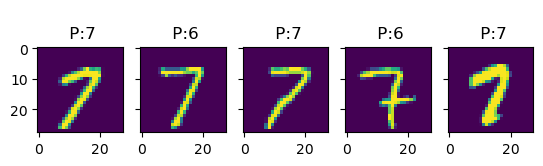

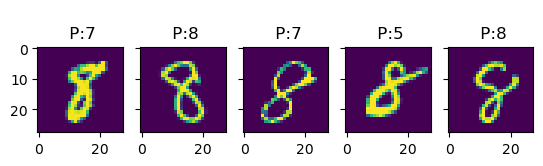

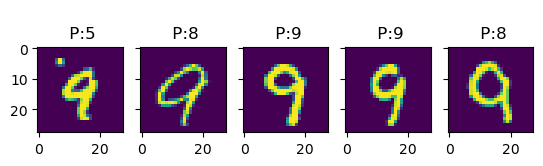

In [ ]:
k = 5
for i in range(0,10):
    idx = np.where(Y_test_true[:]==i)[0] # find indices of i-digit
    fig, ax = plt.subplots(1,k, sharey=True)
    for j in range(0,k):
        title_string = " \n P:" + "{:01d}".format(int(Y_test_pred_round[idx[j]][0]))
        ax[j].set_title(title_string)
        ax[j].imshow(X_test[idx[j],:].reshape(Nx,Ny))
    plt.show()

::: {.callout-tip}
### Exercise
Check training/test accuracy and confusion matrix for different numbers of training data samples.
:::

::: {.callout-tip}
### Exercise
Set initial biases to zero, and freeze its training. Check the change in the confusion matrix and accuracy.
:::

::: {.callout-tip}
### Exercise
Check prediction accuracy and confusion matrix for weights and bias initialization taken from:
1. Uniform distribution [-0.5,0.5]
2. Uniform distribution [0,1]
3. Normal distribution ${\cal N}(0,1)$
:::

::: {.callout-tip}
### Exercise
Implement function for adaptative learning rate $\eta$ with the following rule: check relative change of the training loss after 10 epochs: if it is smaller than 5%, then $\eta_{new} = \kappa\eta_{old}$, $\kappa<1$.
:::

## Activation functions

So far we have been using softmax $\sigma(z) = \frac{1}{1+e^{-x}}$ activation function only. The other activation functions are:

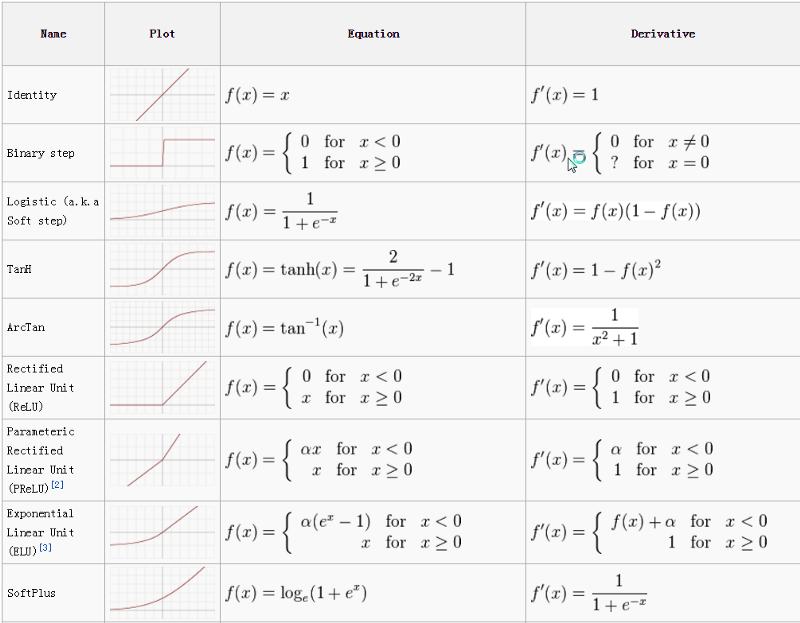

Loss function should be calculated accordignly to the given activation function!

# Optimization algorithms


There are many different optimization algorithms that can be used to train neural networks, and the choice of algorithm can have a significant impact on the performance of the model [[1](https://www.deeplearningbook.org/)]

In general, optimization algorithms for training neural networks can be divided into two categories: 
first-order methods, which only use the gradient of the loss function with respect to the model's parameters, and second-order methods, which also use the Hessian matrix of the loss function. Second-order methods can be more computationally expensive, but they may also be more effective in certain cases.

## Stochastic gradient descent - SGD 


In the standard gradient descent, we computes the gradient of the cost function with respect to the parameters for the entire training dataset. As such, batch gradient descent can be very slow and  intractable for datasets that don't fit in memory. Batch gradient descent also doesn't allow us to update our model online, i.e. with new examples on-the-fly.


In SGD gradient descent, a mini-batch with $m$ samples from the training dataset, and the model's parameters are updated based on the average loss across the samples in each mini-batch. This is in contrast to batch gradient descent, where the model's parameters are updated based on the average loss across the entire dataset.

By using mini-batches, mini-batch gradient descent is able to make faster progress through the training dataset compared to batch gradient descent, and it can also make use of vectorized operations, which can make the training process more efficient.

SGD performs a parameter update for each training example.

## Momentum  algorithm

Momentum optimization is an algorithm that can be used to improve the training of a neural network. It works by adding a fraction of the previous weight update to the current weight update, which helps the model to make faster progress in the right direction and avoid getting stuck in local minima. This fraction is called the momentum coefficient, and it is a hyperparameter that can be adjusted to achieve the best results for a given problem.

The momentum algorithm accumulates a history of the past gradients and continues to move in their direction.
Momentum  helps accelerate SGD  by adding a fraction $\gamma$:

\begin{equation}
\begin{split}
 g_t &=  \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 v_t &= \gamma v_{t-1} - \eta g_t \\
 \theta &= \theta + v_t,
 \end{split}
\end{equation}
where $t$ enumerates training epoch, $\theta$ are trainable parameters of the Neural Network, while $\gamma$ and $\eta$ are hyperparameters.

The velocity $v$ accumulates the gradient of the loss function $L$; the larger $\gamma$ with respect to $\eta$, the more previous gradients affect the current direction.
In standard SGD algorithm, the size step of update was the gradient multiplied by the learning rate. Now, the size step depends on how large and how aligned sequence of gradients are.

The momentum algorithm can be understand as simulation of a particle subjected to Newtonian dynamics. 
The position of particle at time $t$ is given by value of the trainable parameters $\theta(t)$. The particle experiences the net force
\begin{equation}
 f(t) = \frac{\partial^2}{\partial t^2}\theta(t),
\end{equation}
which can be expressed as a set of first time-derivatives:
\begin{equation}
\begin{split}
 v(t) = \frac{\partial}{\partial t}\theta(t) \\
 f(t) = \frac{\partial}{\partial t}v(t)
\end{split}
\end{equation}

In the momentum optimization we have two forces:
 1. One force is proportional to the negative gradient of the cost function 
 \begin{equation}
 f_1 = -\frac{\partial L(\theta)}{\partial \theta}.
 \end{equation}
 This force pushes the particle downhill along the cost function surface. 
 
 2. Second force is proportional to $-v(t)$. Physical intuition is that this force corresponds to viscous drag, as if the particle must push through a resistant medium.


  In addition to speeding up training, momentum optimization can also help the model to generalize better to new data. 

## Adaptative Gradient - Adagrad 

Adaptative Gradient algorithm [[2](https://jmlr.org/papers/v12/duchi11a.html)] is based on the idea of adapting the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

The AdaGrad algorithm works by accumulating the squares of the gradients for each parameter, and then scaling the learning rate for each parameter by the inverse square root of this sum. This has the effect of reducing the learning rate for parameters that have been updated frequently, and increasing the learning rate for parameters that have been updated infrequently.

The update rule for AdaGrad algorithm reads

\begin{equation}
 \begin{split}
 \theta_{t+1} & = \theta_t + \Delta\theta,
 \end{split}
\end{equation}

\begin{equation}
 \begin{split}
 \Delta \theta &= - \frac{\eta}{\sqrt{diag( \epsilon\mathbb{1} + G_t )}} \odot g_t,\\
 g_t &= \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 G_t &= \sum_{\tau = 1}^{t} g_\tau g_\tau^T.
 \end{split}
\end{equation}
where $\odot$ means element-wise multiplication. The $\epsilon \ll 0$ is a regularizing parameter, preventing from division by 0.

Adagrad eliminates the need to manually tune the learning rate, i.e. initially $\eta \ll 1$, and it is effectively adapted during training process. Algorithm can be sensitive to the choice of the initial learning rate, and it may require careful tuning to achieve good results.

## Adadelta: extension of the Adaptative Gradient 

Adadelta algorithm [[3](https://arxiv.org/pdf/1212.5701.pdf)] is based on the idea of adapting the learning rate to the parameters, similar to AdaGrad, but it does not require the specification of a learning rate as a hyperparameter. Adadelta uses an Exponentially Weighted Moving Average (EWMA) of the squared gradients to scale the learning rate. 
The Exponentially Weighted Moving Average (EWMA) for $x_t$ is defined recursively as:

\begin{equation}
 E[x]_t = \gamma E[x]_{t-1} + (1-\gamma) x_t
\end{equation}


In general Adadelta algorithm uses EMWA for $g_t^2$ instead  $G_t = \sum_{\tau = 1}^t g_\tau g_\tau^T$, as in Adagrad, i.e.:

\begin{equation}
 E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2,
\end{equation}
and we update parameters as
\begin{equation}
\begin{split}
 \theta_{t+1} & = \theta_t + \Delta\theta_t \\
 \Delta\theta_t & = - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}}\odot g_t.
\end{split}
\end{equation}
Let's introduce notation $RMS[g]_t = \sqrt{E[g^2]_t + \epsilon}$, where $RMS$ stands for root-mean-square.



However, Matthew D. Zeiler, the Author of Adadelta noticed that  the parameter updates $\Delta\theta$ being applied to $\theta$ shoud have matching units. Considering, that the parameter had some hypothetical units $[\theta]$, the changes to the parameter should be changes in those units as well, i.e.
\begin{equation}
 [\theta] = [\Delta\theta].
\end{equation}
However, assuming the loss function is unitless, we have
\begin{equation}
 [\Delta\theta] = \frac{1}{[\theta]},
\end{equation}
thus units do not match.
This is the case for SGD, Momentum, or Adagrad algorithms.


The second order methods such as Newton’s method that use the second derivative information preserve units for the parameter updates. For function $f(x)$, we have
\begin{equation}
 \Delta x = \frac{\frac{\partial f}{\partial x}}{\frac{\partial^2 f}{\partial x^2}},
\end{equation}
thus units $[\Delta x] = [x]$ are preserved. Keeping this in mind, the update rule in Adadelta algorithm is defined as:
\begin{equation}
 \begin{split}
  \theta_{t+1} & = \theta_t + \Delta_t\theta_t \\
  \Delta\theta_t &= -\frac{RMS[\Delta\theta]_{t-1}}{RMS[g]_t}\odot g_t.
 \end{split}
\end{equation}

This has the effect of automatically adapting the learning rate to the characteristics of the problem, which can make it easier to use than other optimization algorithms that require manual tuning of the learning rate. 


## Adaptive Moment Estimation - Adam  

Adam algorithm [[4](https://arxiv.org/pdf/1412.6980.pdf)] combines the ideas of momentum optimization and Adagrad to make more stable updates and achieve faster convergence.

Like momentum optimization, Adam uses an exponentially decaying average of the previous gradients to determine the direction of the update. This helps the model to make faster progress in the right direction and avoid oscillations. Like AdaGrad, Adam also scales the learning rate for each parameter based on the inverse square root of an exponentially decaying average of the squared gradients. This has the effect of reducing the learning rate for parameters that have been updated frequently, and increasing the learning rate for parameters that have been updated infrequently.

Adam uses Exponentially Modified Moving Average for gradients and its square:

\begin{equation}
\begin{split}
 g_t &= \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 m_t &= \beta_1 m_{t-1} + (1-\beta_1)g_t \\
 v_t &= \beta_2 v_{t-1} + (1-\beta_2)g_t^2.
\end{split}
\end{equation}

The update rule for the parameters reads:

\begin{equation}
\Delta \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon}\hat{m}_t,
\end{equation}
where
\begin{equation}
\begin{split}
\hat{m}_t &= \frac{m_t}{1-\beta_1}\\
\hat{v}_t &= \frac{v_t}{1-\beta_2},
\end{split}
\end{equation}
are bias-corrected first and second gradient moments estimates.

Authors suggest to set $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\eta = 10^{-8}$.


::: {.callout-tip}
### Exercise
Implement mini-batch SGD algorithm. In the training loop feed-forward training data with fixed size batches and update gradients after each batch. 
Steps:

1. Fix batch size $n_b$

2. Calculate number of batches $N_b = N_{train}/n_b$

3. Loop over training epochs:

    3.1. Loop over number of batches: 
    
        3.1.1 at each iteration randomly choose batch size training points from training data set
        
        3.1.2 feed-forward through network
        
        3.1.3 backpropagate and update weights
        
    3.2 Calculate loss on test dataset, and on a single batch from the training dataset
:::

# References

[1] Goodfellow, I., Bengio, Y., Courville, A. "Deep Learning", MIT Press (2016), https://www.deeplearningbook.org/

[2] Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization. Journal of Machine Learning Research, 12, 2121–2159 \\

[3] Zeiler, M. D. (2012). ADADELTA: An Adaptive Learning Rate Method. Retrieved from http://arxiv.org/abs/1212.5701 

[4] Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.  https://arxiv.org/abs/1412.6980